# Visualising CT images in 3D with ipyvolume

In [5]:
!rm -rf /Users/maartenbreddels/anaconda3/envs/pygrunn/lib/python3.6/site-packages/dicom*

In [6]:
!pip install dicom

  Using cached dicom-0.9.9.post1-py3-none-any.whl


In [1]:
import os
import sys
import glob
import dicom
import pylab as p
import numpy as np
import ipyvolume as ipv

/Users/maartenbreddels/anaconda3/envs/pygrunn/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


### Read the individual slices 

In [2]:
#!cp -r /data/users/jovan/kaggle/DSB2017/data/stage1/0015ceb851d7251b8f399e39779d1e7d .

In [3]:
# Set up the location of the individual .dcm files
datalist = glob.glob('0015ceb851d7251b8f399e39779d1e7d/*dcm')

# Read each slice in turn
slices = np.zeros(len(datalist), dtype='object')
for i,v in enumerate(datalist):
    slices[i] = dicom.read_file(v)

### Display one slice as an example

In [4]:
datalist

['0015ceb851d7251b8f399e39779d1e7d/00ac2629fe659e68f4879da4812af659.dcm',
 '0015ceb851d7251b8f399e39779d1e7d/0142676d603719d164fe77097c086741.dcm',
 '0015ceb851d7251b8f399e39779d1e7d/018a0959730e9889f55670e7687af559.dcm',
 '0015ceb851d7251b8f399e39779d1e7d/01c1ce911922eb684a0b595d4e7f7a42.dcm',
 '0015ceb851d7251b8f399e39779d1e7d/0305df4fa1defc17ff0382a9edddb99b.dcm',
 '0015ceb851d7251b8f399e39779d1e7d/04f4264b1ee25de0e893f72c165bf0c9.dcm',
 '0015ceb851d7251b8f399e39779d1e7d/07a038952758a77e0e0a4d948e96016f.dcm',
 '0015ceb851d7251b8f399e39779d1e7d/08e9a8fe300e1d29f56fd43e33d79c01.dcm',
 '0015ceb851d7251b8f399e39779d1e7d/0c6ea778108725496e6be949487804d4.dcm',
 '0015ceb851d7251b8f399e39779d1e7d/0cb04985d6fe1de48f50230af846e5d2.dcm',
 '0015ceb851d7251b8f399e39779d1e7d/0cf1e276b8a67d5c4a9008398eb5a196.dcm',
 '0015ceb851d7251b8f399e39779d1e7d/0d07c2017be2bbc71d26e085312784bc.dcm',
 '0015ceb851d7251b8f399e39779d1e7d/0da2b019ac7a536e66e6a41ef8829233.dcm',
 '0015ceb851d7251b8f399e39779d1e7d/0e0

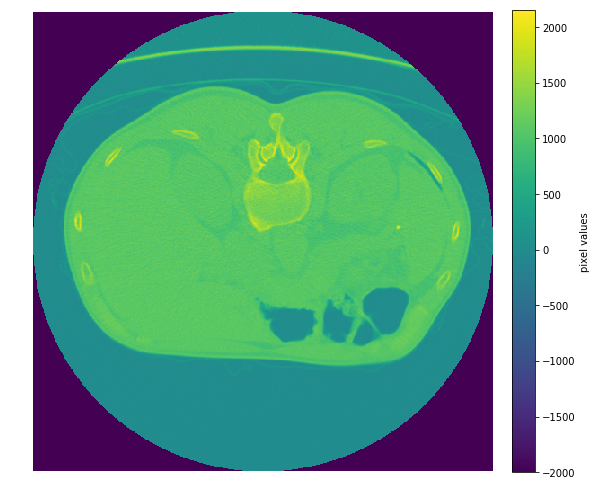

In [5]:
p.figure(figsize=(9,9))
p.imshow(slices[100].pixel_array, origin='lower')
p.colorbar(fraction=0.046, pad=0.04, label='pixel values')
p.axis('off')
p.show()

### Create a 3D datacube from the individual slices

In [6]:
instances = [i.InstanceNumber for i in slices]
idx = np.argsort(instances)
ZZ  = np.array([slices[index].pixel_array for index in idx])
d = ZZ[::2,::4,::4].T

In [7]:
ipv.quickvolshow(d, lighting=False)